In [1]:
import time
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import tushare as ts
ts.set_token('29eaf3bcac23df4c6d025de157ab2d53beead3391fbe6e83b4ebcb6c')
pro = ts.pro_api()

import mpl_finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
sns.set()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'

D:\Users\admin\Anaconda3\envs\py37-stock\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [3]:
from mylab.stock.myread import getStock
from mylab.stock.myread import getIndex
from mylab.stock.myread import getIndexBasic
from mylab.stock.myread import getStockBasic
from mylab.stock.myread import readData
from mylab.stock.myread import mergeDailyWeeklyMonthly
from mylab.stock.myread import mergeStockIndex
from mylab.stock.myread import getIndustry

from mylab.stock.myfeature import getMacd
from mylab.stock.myfeature import getKdj
from mylab.stock.myfeature import getMa

from mylab.stock.myplot import plotVol
from mylab.stock.myplot import plotCandle
from mylab.stock.myplot import plotMacd
from mylab.stock.myplot import plotKdj

from mylab.stock.my3point import get3Percent
from mylab.stock.my3point import plotStock
from mylab.stock.my3point import plot3Percent
from mylab.stock.my3point import displaySelect

In [4]:
SAVE_CSV = True
LOCAL = not True

GET_DAILY = True
SELECT_STOCK = True

start_date = "20160101"
end_date = "20200413"

# get all Stocks Info

In [5]:
#获取基础信息数据，包括股票代码、名称、上市日期、退市日期等

pool_df = getStockBasic(LOCAL = True)
# pool_df = pd.read_csv("./data/stock/blue_stock_rank_3.csv" )


print('获得上市股票总数：', len(pool_df)-1)
pool_df.head()

获得上市股票总数： 3796


,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,1,平安银行,深圳,银行,主板,19910403
1,000002.SZ,2,万科A,深圳,全国地产,主板,19910129
2,000004.SZ,4,国农科技,深圳,生物制药,主板,19910114
3,000005.SZ,5,世纪星源,深圳,环境保护,主板,19901210
4,000006.SZ,6,深振业A,深圳,区域地产,主板,19920427


# update all stocks daily

0

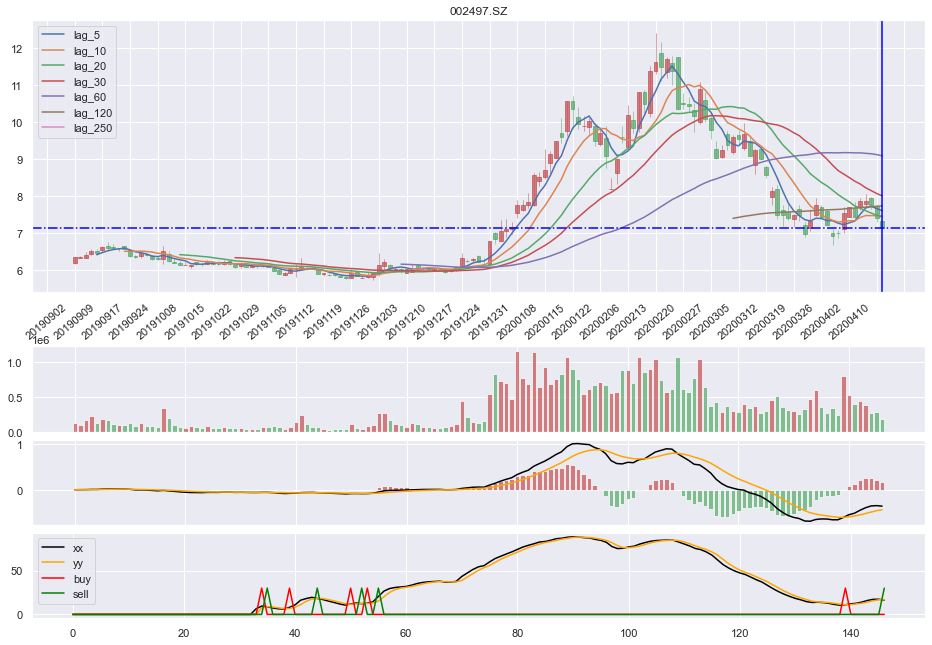

In [6]:
start_date = "20190901"
# end_date = "20200101"
stock_code = "002497.SZ"
save_dir = "./output/select_by_3_percent/"

stock_df = getStock(stock_code,start_date, end_date, LOCAL = True)
stock_df = get3Percent(stock_df)
plotStock(stock_df ,SAVE = False, save_dir =save_dir)

# save all stocks in 3% state

In [7]:
def selectStockBy3Percent(df):
    select_num = np.any( [stock_df.buy_signal.values>0,
                          stock_df.sell_signal.values>0 ,
                         ],
                        axis = 0)   # IF( CROSS(xx,yy) AND xx<20 ,30,0);
    select_df = stock_df.loc[select_num,:]
    return select_df

In [8]:
start_date = "20100101"
# end_date = "20200101"
stock_code = "002497.SZ"
save_dir = "./output/select_by_3_percent/all_3_percent/"

for i in range(len(pool_df)):  # len(pool_df)
    stock_code = pool_df.loc[i,"ts_code"]
    stock_name = pool_df.loc[i,"name"]
    try:
        stock_df = getStock(stock_code,start_date, end_date, LOCAL = True)
        stock_df = get3Percent(stock_df)
        select_df = selectStockBy3Percent(stock_df )  # stock  
        select_df = select_df.reset_index()
        select_df = select_df.loc[1:,:]
        select_df.rename(columns = {"index":"pre_index"}, inplace = True)
        select_df.to_csv(save_dir+stock_code+".csv", index = False)
    except Exception as err:
        print(stock_code,stock_name,err)
    
print(select_df.shape)
select_df.head()

002977.SZ 天箭科技 local variable 'daily_df' referenced before assignment
300823.SZ 建科机械 local variable 'daily_df' referenced before assignment
603221.SH N爱丽 local variable 'daily_df' referenced before assignment
688051.SH 佳华科技 local variable 'daily_df' referenced before assignment
(4, 68)


,pre_index,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,...,dea_monthly,macd_monthly,macd_signal_monthly,var,xx,xx1,yy,cross_signal,buy_signal,sell_signal
1,74,688399.SH,20200327,85.58,85.58,80.11,80.11,83.30,-3.19,-3.8295,...,0.732392,0.673391,0.0,30.794424,21.268410,20.208056,19.495105,1.0,0,30
2,76,688399.SH,20200331,77.97,78.00,74.26,74.89,77.35,-2.46,-3.1803,...,0.732392,0.673391,0.0,10.749076,19.626364,20.614035,20.623235,-1.0,0,30
3,80,688399.SH,20200407,75.00,78.20,74.68,76.43,73.74,2.69,3.6480,...,0.732392,0.673391,0.0,20.812476,16.364636,15.870078,16.148617,0.0,30,0
4,83,688399.SH,20200410,78.31,81.48,77.83,79.79,77.70,2.09,2.6898,...,0.732392,0.673391,0.0,33.471313,20.232953,18.761363,18.183799,1.0,0,30


# evaluate the result

In [11]:
for i in range(len(pool_df)):  # len(pool_df)
    stock_code = pool_df.loc[i,"ts_code"]
    stock_name = pool_df.loc[i,"name"]
    try:
        stock_df = pd.read_csv(save_dir+stock_code+".csv")
        stock_df["hold_period"] = np.nan
        stock_df["earn_rate"] = np.nan 
        stock_df["earn_rate_max"] = np.nan 
        for i in range(len(stock_df)):
            if stock_df.buy_signal.values[i] > 0:
                for j in range(i,len(stock_df)):
                    if stock_df.sell_signal.values[j] > 0:
                        stock_df["earn_rate"][i] = (stock_df.close.values[j]-stock_df.close.values[i])/stock_df.close.values[i]*100
                        stock_df["earn_rate_max"][i] = (stock_df.high.values[j]-stock_df.close.values[i])/stock_df.close.values[i]*100
                        stock_df["hold_period"][i] = (stock_df.pre_index.values[j]-stock_df.pre_index.values[i]) + 1
                        
                        break
        stock_df["earn_rate_per_day"] = stock_df["earn_rate"]/stock_df["hold_period"]
        stock_df["win"] = stock_df["earn_rate"] > 0
        stock_df.to_csv(save_dir+stock_code+".csv", index = False)
    except Exception as err:
        print(stock_code,stock_name,err)
print(stock_df.shape)
stock_df.head()

002977.SZ 天箭科技 [Errno 2] File ./output/select_by_3_percent/all_3_percent/002977.SZ.csv does not exist: './output/select_by_3_percent/all_3_percent/002977.SZ.csv'
300823.SZ 建科机械 [Errno 2] File ./output/select_by_3_percent/all_3_percent/300823.SZ.csv does not exist: './output/select_by_3_percent/all_3_percent/300823.SZ.csv'
603221.SH N爱丽 [Errno 2] File ./output/select_by_3_percent/all_3_percent/603221.SH.csv does not exist: './output/select_by_3_percent/all_3_percent/603221.SH.csv'
688051.SH 佳华科技 [Errno 2] File ./output/select_by_3_percent/all_3_percent/688051.SH.csv does not exist: './output/select_by_3_percent/all_3_percent/688051.SH.csv'
(4, 73)


,pre_index,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,...,xx1,yy,cross_signal,buy_signal,sell_signal,hold_period,earn_rate,earn_rate_max,earn_rate_per_day,win
0,74,688399.SH,20200327,85.58,85.58,80.11,80.11,83.30,-3.19,-3.8295,...,20.208056,19.495105,1.0,0,30,NaN,NaN,NaN,NaN,False
1,76,688399.SH,20200331,77.97,78.00,74.26,74.89,77.35,-2.46,-3.1803,...,20.614035,20.623235,-1.0,0,30,NaN,NaN,NaN,NaN,False
2,80,688399.SH,20200407,75.00,78.20,74.68,76.43,73.74,2.69,3.6480,...,15.870078,16.148617,0.0,30,0,4.0,4.39618,6.607353,1.099045,True
3,83,688399.SH,20200410,78.31,81.48,77.83,79.79,77.70,2.09,2.6898,...,18.761363,18.183799,1.0,0,30,NaN,NaN,NaN,NaN,False


In [17]:
all_df = pool_df.copy(deep = True)
all_df["win_rate"] = np.nan
all_df["earn_rate_per_day"] = np.nan
all_df["earn_rate"] = np.nan
all_df["hold_period"] = np.nan
all_df["num_3_percent"] = np.nan

for i in range(len(pool_df)):  # len(pool_df)
    stock_code = pool_df.loc[i,"ts_code"]
    stock_name = pool_df.loc[i,"name"]
    try:
        stock_df = pd.read_csv(save_dir+stock_code+".csv")
        stock_df = stock_df.loc[stock_df.buy_signal.values>0,:]
        if len(stock_df) > 10 :
            all_df["win_rate"][i]  = sum(stock_df["win"].values)/len(stock_df)
            all_df["earn_rate_per_day"][i]  = sum(stock_df["earn_rate_per_day"].values)/len(stock_df)
            all_df["earn_rate"][i]  = sum(stock_df["earn_rate"].values)/len(stock_df)
            all_df["hold_period"][i]  = sum(stock_df["hold_period"].values)/len(stock_df)
            all_df["num_3_percent"][i] = len(stock_df)
       
    except Exception as err:
        print(stock_code,stock_name,err)

all_df.to_csv("./output/"+"stocks_statistic_analyse.csv", index = False)
print(all_df.shape)
all_df.head()

002977.SZ 天箭科技 [Errno 2] File ./output/select_by_3_percent/all_3_percent/002977.SZ.csv does not exist: './output/select_by_3_percent/all_3_percent/002977.SZ.csv'
300823.SZ 建科机械 [Errno 2] File ./output/select_by_3_percent/all_3_percent/300823.SZ.csv does not exist: './output/select_by_3_percent/all_3_percent/300823.SZ.csv'
603221.SH N爱丽 [Errno 2] File ./output/select_by_3_percent/all_3_percent/603221.SH.csv does not exist: './output/select_by_3_percent/all_3_percent/603221.SH.csv'
688051.SH 佳华科技 [Errno 2] File ./output/select_by_3_percent/all_3_percent/688051.SH.csv does not exist: './output/select_by_3_percent/all_3_percent/688051.SH.csv'
(3797, 12)


,ts_code,symbol,name,area,industry,market,list_date,win_rate,earn_rate_per_day,earn_rate,hold_period,num_3_percent
0,000001.SZ,1,平安银行,深圳,银行,主板,19910403,0.403846,-0.011768,0.214651,3.826923,52.0
1,000002.SZ,2,万科A,深圳,全国地产,主板,19910129,0.535714,0.238760,0.882616,4.321429,28.0
2,000004.SZ,4,国农科技,深圳,生物制药,主板,19910114,0.578947,0.086952,1.636463,5.894737,19.0
3,000005.SZ,5,世纪星源,深圳,环境保护,主板,19901210,0.367347,-0.045272,-0.007705,4.816327,49.0
4,000006.SZ,6,深振业A,深圳,区域地产,主板,19920427,0.485714,-0.129481,-0.324987,5.028571,35.0


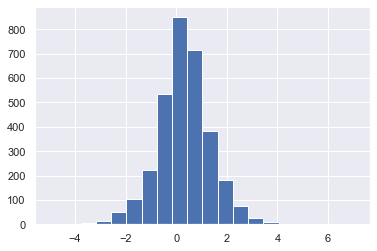

In [23]:
all_df = pd.read_csv("./output/"+"stocks_statistic_analyse.csv")
# all_df = all_df.loc[all_df["hold_period"].values < 12,:]
all_df.earn_rate.hist(bins = 20)

(824, 12)


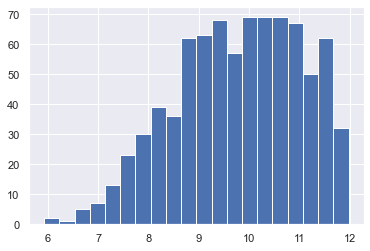

In [64]:
all_df = pd.read_csv("./output/"+"stocks_statistic_analyse.csv")
# earn_rate_per_day earn_rate hold_period num_3_percent
all_df = all_df.loc[all_df["win_rate"].values > 0.5,:]
all_df = all_df.loc[all_df["earn_rate_per_day"].values > 0.3,:]
all_df = all_df.loc[all_df["earn_rate"].values > 1,:]
all_df = all_df.loc[all_df["hold_period"].values < 12,:]
all_df = all_df.loc[all_df["num_3_percent"].values > 30,:]
all_df.to_csv("./output/"+"stocks_statistic_analyse_rank1.csv", index = False)
print(all_df.shape)
all_df.hold_period.hist(bins = 20)

(289, 12)


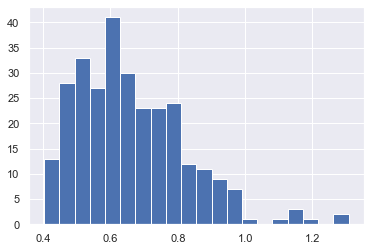

In [62]:
all_df = pd.read_csv("./output/"+"stocks_statistic_analyse.csv")
# earn_rate_per_day earn_rate hold_period num_3_percent
all_df = all_df.loc[all_df["win_rate"].values > 0.6,:]
all_df = all_df.loc[all_df["earn_rate_per_day"].values > 0.4,:]
all_df = all_df.loc[all_df["earn_rate"].values > 2,:]
all_df = all_df.loc[all_df["hold_period"].values < 10,:]
all_df = all_df.loc[all_df["num_3_percent"].values > 25,:]
# all_df = all_df.loc[all_df["num_3_percent"].values < 50,:]
all_df.to_csv("./output/"+"stocks_statistic_analyse_rank2.csv", index = False)
print(all_df.shape)
all_df.earn_rate_per_day.hist(bins = 20)

(117, 12)


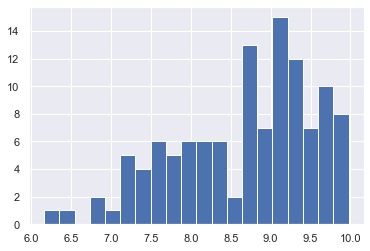

In [63]:
all_df = pd.read_csv("./output/"+"stocks_statistic_analyse.csv")
# earn_rate_per_day earn_rate hold_period num_3_percent
all_df = all_df.loc[all_df["win_rate"].values > 0.7,:]
all_df = all_df.loc[all_df["earn_rate_per_day"].values > 0.5,:]
all_df = all_df.loc[all_df["earn_rate"].values > 3,:]
all_df = all_df.loc[all_df["hold_period"].values < 10,:]
all_df = all_df.loc[all_df["num_3_percent"].values > 25,:]
# all_df = all_df.loc[all_df["num_3_percent"].values < 50,:]
all_df.to_csv("./output/"+"stocks_statistic_analyse_rank3.csv", index = False)
print(all_df.shape)
all_df.hold_period.hist(bins = 20)

# select stocks by 3 percent

In [7]:
start_date = "20191201"
# end_date = "20200323"

all_select_df = pd.DataFrame()
err_num = 0
for i in range(2):  # len(pool_df)
    stock_code = pool_df.loc[i,"ts_code"]
    stock_name = pool_df.loc[i,"name"]
    if stock_code[0] == "0":
        try:
            stock_df = getStock(stock_code,start_date, end_date, LOCAL = True)
            stock_df = get3Percent(stock_df)
            select_df = selectStockBy3Percent(stock_df )  # stock         
        except:
            err_num = err_num +1
            pass
        if len(select_df) > 0:  
            all_select_df  = pd.concat([all_select_df,select_df],axis = 0)
print("num of err：",err_num)
all_select_df.to_csv("./output/"+"stock_selected_by_3_percent.csv", index = False)
print(all_select_df.shape)
print("end date: ",end_date)
all_select_df = all_select_df.loc[all_select_df["trade_date"] == end_date,:]
stocks_code = all_select_df.ts_code.values
print(all_select_df.shape)
all_select_df.head()

num of err： 0
(1, 67)
end date:  20200410
(0, 67)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,dea_monthly,macd_monthly,macd_signal_monthly,var,xx,xx1,yy,cross_signal,buy_signal,sell_signal


In [8]:
# all_select_df.to_csv("./output/"+"stock_selected_by_3_percent.csv", index = False)
all_select_df = pd.read_csv("./output/"+"stock_selected_by_3_percent.csv")
all_select_df["trade_date"] = all_select_df["trade_date"].astype(str)
print(all_select_df.shape)
print("end date: ",end_date)
# all_select_df = all_select_df.loc[all_select_df["trade_date"] == end_date,:]
all_select_df.to_csv("./output/"+"stock_selected_by_3_percent_"+end_date+".csv", index = False)
stocks_code = all_select_df.ts_code.values
print(all_select_df.shape)
all_select_df.head()

(1, 67)
end date:  20200410
(1, 67)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,dea_monthly,macd_monthly,macd_signal_monthly,var,xx,xx1,yy,cross_signal,buy_signal,sell_signal
0,000001.SZ,20200325,12.88,13.07,12.7,12.87,12.61,0.26,2.0619,1136957.74,...,-0.030573,-0.055384,0.0,25.393701,17.482653,16.602289,16.614133,0.0,30,0


In [9]:
save_dir = "./output/select_by_3_percent/"
start_date = "20140101"
# end_date = "20200323"

# all_select_df = pd.read_csv("./output/"+"stock_selected_by_industry_KDJ.csv")
# stocks_code = ["002497.SZ"]  # stock 
for stock_code in stocks_code:
    stock_df = getStock(stock_code,start_date, end_date , LOCAL = True)
    stock_df = get3Percent(stock_df)
    select_df = selectStockBy3Percent(stock_df )  # stock 
    print(stock_code,len(select_df))
    for i in range(len(select_df)):
        ix = select_df.index[i]
        trade_date = select_df.trade_date.values[i]
        display_df = displaySelect(stock_df,ix, trade_date= trade_date, save_dir = save_dir )
        plt.close()                

000001.SZ 32
